Each problem is worth 25 points. Problem 1 and 2 are graded based on the test set accuracy of your best model.

### Problem 1   
Use the newspam data attached. After cleaning, doing variable selection (by various methods of your choice), divide the data into testing and training with 80, 20 rule. Make  Logistic Regression, Decision Tree, and Random Forest Models (pick your own number of estimators) to classify the last column with 0s and 1s ( mean spam and ham, respectively). Report the accuracies for all three models, both for testing and training. Which model is the winner?

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn import tree
from sklearn import model_selection as modsel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans as km
from sklearn.metrics import plot_roc_curve as prc
import seaborn as sns
from sklearn.model_selection import train_test_split
spam = pd.read_csv('newspam.csv')

In [297]:
spam.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,outcome
0,0.96,0.00,0.00,0.000,1.93,0.32,0.00,0.0,278,0.32,0.778,0.00,1
1,1.59,0.43,0.21,0.180,3.47,0.14,0.07,0.0,1028,0.14,0.372,0.21,1
2,0.51,1.16,0.19,0.184,1.36,0.06,0.06,0.0,2259,1.23,0.276,0.38,1
3,0.31,0.00,0.31,0.000,3.18,0.31,0.00,0.0,191,0.63,0.137,0.31,1
4,0.31,0.00,0.31,0.000,3.18,0.31,0.00,0.0,191,0.63,0.135,0.31,1


In [298]:
y = spam['outcome']
x = spam[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
x = sm.add_constant(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 17)

In [299]:
#Logistic Regression

In [300]:
model = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()

In [301]:
logit = sm.Logit(y, sm.add_constant(x), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.327323
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4592
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Nov 2021   Pseudo R-squ.:                  0.5118
Time:                        16:55:03   Log-Likelihood:                -1506.0
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7761      0.073    -24.389      0.000      -1.919      -1.633
x1             0.3100      0.037      8.477      0.000       0.238       0.382
x2             4.4310      0.540      8.207      0.000       3.373       5.489
x3             4.1263      0.375     11.010      0.000       3.392       4.861
x4             8.2135      0.663     12.381      0.000       6.913       9.514
x5             0.0930      0.024      3.895      0.000       0.046       0.140
x6             0.8819      0.092      9.627      0.000       0.702       1.061
x7             1.5662      0.186      8.426      0.000       1.202       1.931
x8            -2.4552      0.243    -10.120      0.000      -2.931      -1.980
==============================================================================
"""

In [302]:
model = sm.OLS(ytest, sm.add_constant(xtest)).fit()

In [303]:
logit = sm.Logit(ytest, sm.add_constant(xtest), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.306313
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                  921
Model:                          Logit   Df Residuals:                      912
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Nov 2021   Pseudo R-squ.:                  0.5465
Time:                        16:55:06   Log-Likelihood:                -282.11
converged:                       True   LL-Null:                       -622.04
Covariance Type:            nonrobust   LLR p-value:                1.550e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7049      0.165    -10.349      0.000      -2.028      -1.382
x1             0.2428      0.084      2.875      0.004       0.077       0.408
x2             2.2350      0.678      3.296      0.001       0.906       3.564
x3             5.3967      1.155      4.673      0.000       3.133       7.660
x4            12.5056      2.165      5.775      0.000       8.261      16.750
x5             0.0884      0.054      1.627      0.104      -0.018       0.195
x6             1.1197      0.263      4.251      0.000       0.603       1.636
x7             1.8114      0.453      3.999      0.000       0.924       2.699
x8            -5.4592      1.360     -4.015      0.000      -8.124      -2.794
==============================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [304]:
ytrainpred = result.predict(xtrain)
ytestpred = result.predict(xtest)

In [305]:
metrics.accuracy_score(ytrain, round(ytrainpred))

0.8790760869565217

In [306]:
metrics.accuracy_score(ytest, round(ytestpred))

0.8773072747014115

In [307]:
#Decision Tree

In [308]:
cart = DecisionTreeClassifier()
cart.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [309]:
from sklearn import tree
tree = tree.export_text(cart)

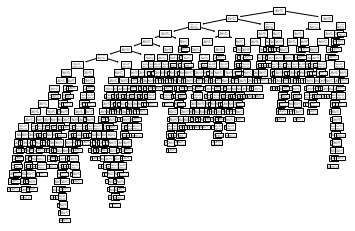

<Figure size 7200x7200 with 0 Axes>

In [310]:
from sklearn import tree
tree.plot_tree(cart)
plt.figure(figsize = (100, 100))
plt.show()

In [311]:
ytrainpred2 = cart.predict(xtrain)
ytestpred2 = cart.predict(xtest)

In [312]:
metrics.accuracy_score(ytrain, ytrainpred2)

0.9771739130434782

In [313]:
metrics.accuracy_score(ytest, ytestpred2)

0.8914223669923995

In [314]:
#Random Forest

In [315]:
rfmodel = RandomForestClassifier(n_estimators = 50, bootstrap = True)
rfmodel = rfmodel.fit(xtrain, ytrain)

In [316]:
ytrainpred3 = rfmodel.predict(xtrain)
ytestpred3 = rfmodel.predict(xtest)

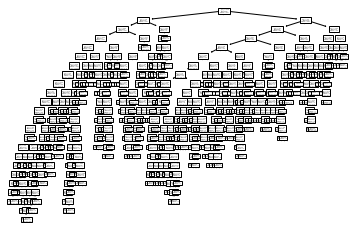

<Figure size 7200x7200 with 0 Axes>

In [317]:
rand = rfmodel.estimators_[0]
plot_tree(rand)
plt.figure(figsize = (100, 100))
plt.show()

In [318]:
metrics.accuracy_score(ytrain, ytrainpred3)

0.9769021739130435

In [319]:
metrics.accuracy_score(ytest, ytestpred3)

0.9174809989142236

The model with the highest accuracies is the Random Forest Model.

### Problem 2 
Continuing with the three models from problem 1, plot the ROC curve for the training and testing both in a graph for each model. This means that you will have to make three plots. Then find the AUC score for the testing and pick the best model you have.

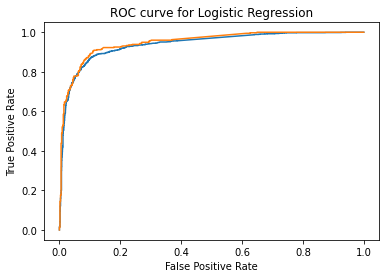

In [320]:
fpr, tpr, thresholds = metrics.roc_curve(ytrain, ytrainpred)
fpr1, tpr1, thresholds1 = metrics.roc_curve(ytest, ytestpred)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.title("ROC curve for Logistic Regression")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [321]:
metrics.roc_auc_score(ytest, ytestpred)

0.9493151756298331

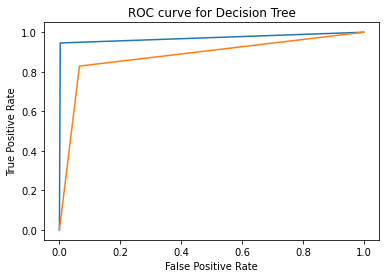

In [322]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(ytrain, ytrainpred2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(ytest, ytestpred2)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.title("ROC curve for Decision Tree")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [323]:
metrics.roc_auc_score(ytest, ytestpred2)

0.8815317385056067

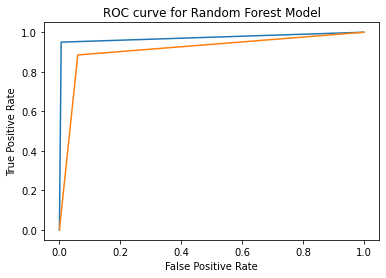

In [324]:
fpr4, tpr4, thresholds4 = metrics.roc_curve(ytrain, ytrainpred3)
fpr5, tpr5, thresholds5 = metrics.roc_curve(ytest, ytestpred3)
plt.plot(fpr4, tpr4)
plt.plot(fpr5, tpr5)
plt.title("ROC curve for Random Forest Model")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [325]:
metrics.roc_auc_score(ytest, ytestpred3)

0.9123488351631163

The best model is the Logistic Regression since the accuracy score of the testing is the highest.

### Problme 3
Use the original data (after removing null values, if any) but only the variables you selected to use in problem 1. Remove the last column ( dependent variable) with 0s and 1s as you will be using the clustering algorithm here. Train a KMeans clustering model in this problem (no need to split in test and train) and find 4 clusters. The clustering algorithm finds clusters, and you do not need to worry about the accuracy score here (needs more advanced concepts). Find a pair of variables ( x and y) among the ones you used for the KMeans model and plot 4 clusters with four different colors. Try various x and y  before settling on a graph that clearly shows 4 clusters on the graph.  Here is reference material on KMeans from one of the reference textbooks we use. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [326]:
spam1 = spam[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]

In [327]:
x = spam1[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]

In [328]:
kmeans = km(n_clusters = 4)
kmeans.fit(x)
ykmeans = kmeans.predict(x)
x = np.array(x)

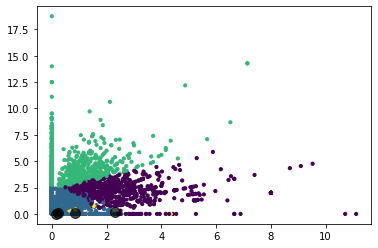

In [329]:
plt.scatter(x[:, 0], x[:, 4], c = ykmeans, s = 10, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.7)

### Problem 4
Plot the decision boundary from the KMeans algorithm in problem 3. You are separating four clusters by lines in this problem. Some hints are here. https://datascience.stackexchange.com/questions/53918/is-there-a-way-to-put-a-separate-line-between-clusters-for-k-means-clustering

In [330]:
h = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 4].min() - 1, x[:, 4].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))